In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

#estimators Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#estimators Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

#model metrics Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
#model metrics Classification
from sklearn.metrics import confusion_matrix, classification_report

#cross validation
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

%matplotlib inline

## Tasks
1.	App with large number of reviews
2.	App with the largest size
3.	App with the largest num of installs
4.	Paid vs Free
5.	App which hasn't been updated
6.	Most popular category
7.	Background analysis
8.	Data visualization
9.	Data cleaning
10.	Feature engineering
11.	Insights generation
12.	Model creation - baseline
13.	Model creation - Final
14.	Model test and submission

## Import Data

In [2]:
df_apps = pd.read_csv('googleplaystore.csv', header=0)
df_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [3]:
df_apps.shape

(10840, 13)

In [4]:
df_apps.dtypes.index

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df_apps.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


## Exploratory Data Analysis

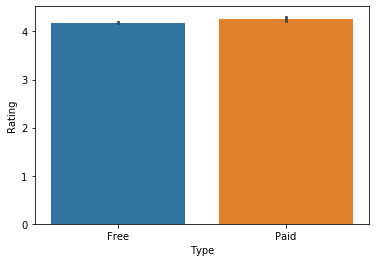

In [6]:
sns.barplot(x='Type', y='Rating', data=df_apps)

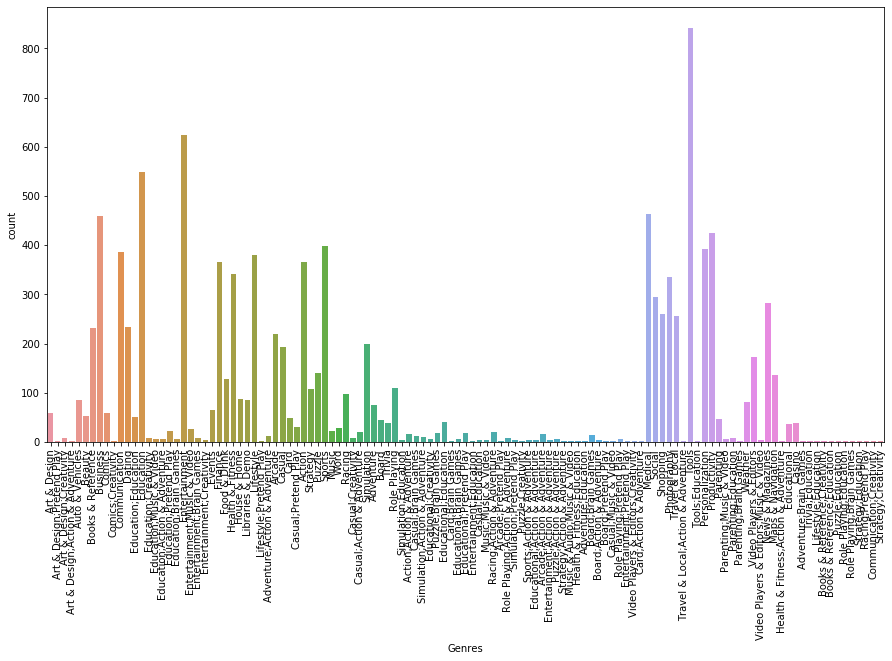

In [7]:
plt.figure(figsize=(15, 8))
sns.countplot(df_apps['Genres'],label="Count")
plt.xticks(rotation='vertical')
plt.show()

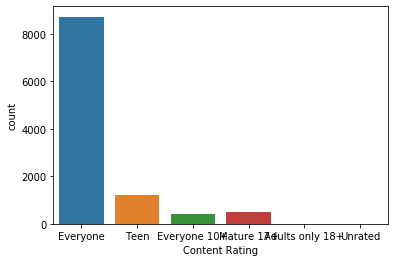

In [8]:
sns.countplot(x='Content Rating',data=df_apps)

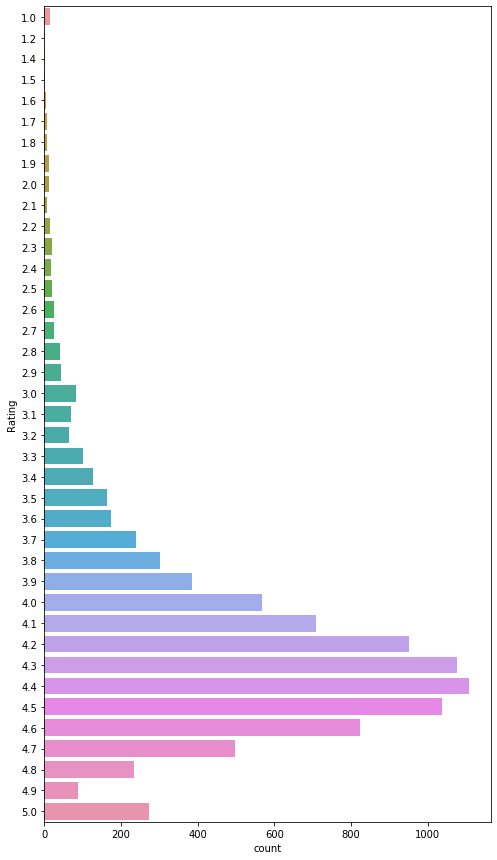

In [9]:
plt.figure(figsize=(8, 15))
sns.countplot(y='Rating',data=df_apps )
plt.show()

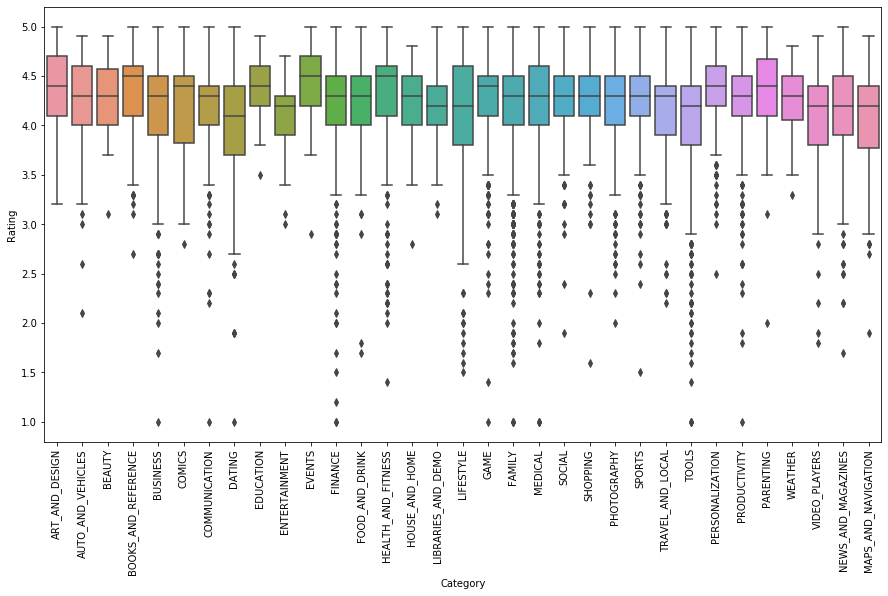

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Rating', data=df_apps)
plt.xticks(rotation='vertical')
plt.show()

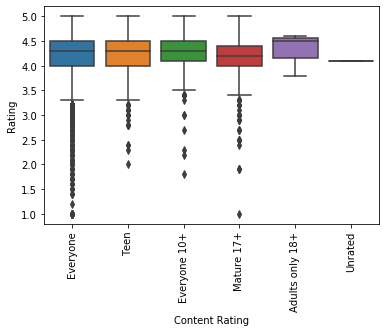

In [11]:
#plt.figure(figsize=(15, 8))
sns.boxplot(x='Content Rating', y='Rating', data=df_apps)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
from datetime import datetime
df_apps["Last Updated"] = [datetime.strptime(i, '%d-%b-%y') for i in df_apps["Last Updated"]]
#df_apps = df_apps.set_index("Last Updated")
#df_apps.sort_values(by=['0'], ascending=False)
#df_apps = df_apps.sort_values(df_apps['Last Updated'])
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [13]:
# App which hasn't been updated
min(df_apps['Last Updated'])
print(df_apps[df_apps['Last Updated'] == df_apps['Last Updated'].min()]) 

                            App Category  Rating  Reviews  Size  Installs  \
7479  FML F*ck my life + widget   FAMILY     4.2     1415  209k  100,000+   

      Type Price Content Rating         Genres Last Updated Current Ver  \
7479  Free     0       Everyone  Entertainment   2010-05-21         3.1   

     Android Ver  
7479  1.5 and up  


## Data Pre Processing 

In [14]:
#Detection of Missing Values
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null datetime64[ns]
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 1.1+ MB


In [15]:
df_apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [62]:
#Missing values in Rating should be filled with the integer value of 0
df_apps['Rating'] = df_apps['Rating'].fillna(int(0))

In [17]:
df_apps.dropna(inplace = True)

In [18]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10839
Data columns (total 13 columns):
App               10829 non-null object
Category          10829 non-null object
Rating            10829 non-null float64
Reviews           10829 non-null int64
Size              10829 non-null object
Installs          10829 non-null object
Type              10829 non-null object
Price             10829 non-null object
Content Rating    10829 non-null object
Genres            10829 non-null object
Last Updated      10829 non-null datetime64[ns]
Current Ver       10829 non-null object
Android Ver       10829 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 1.2+ MB


In [19]:
# Cleaning Categories into integers
CategoryString = df_apps["Category"]
categoryVal = df_apps["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df_apps["Category_c"] = df_apps["Category"].map(category_dict).astype(int)

In [20]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df_apps["Size"] = df_apps["Size"].map(change_size)

#filling Size which had NA
df_apps.Size.fillna(method = 'ffill', inplace = True)

In [21]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df_apps['Type'] = df_apps['Type'].map(type_cat)

In [22]:
#Cleaning of genres
GenresL = df_apps.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df_apps['Genres_c'] = df_apps['Genres'].map(GenresDict).astype(int)

In [23]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df_apps['Price'] = df_apps['Price'].map(price_clean).astype(float)

In [24]:
# convert reviews to numeric
df_apps['Reviews'] = df_apps['Reviews'].astype(int)

In [25]:
#Cleaning of content rating classification
RatingL = df_apps['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df_apps['Content Rating'] = df_apps['Content Rating'].map(RatingDict).astype(int)

In [26]:
#Cleaning no of installs classification
df_apps['Installs'] = [int(i[:-1].replace(',','')) for i in df_apps['Installs']]

In [27]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10839
Data columns (total 15 columns):
App               10829 non-null object
Category          10829 non-null object
Rating            10829 non-null float64
Reviews           10829 non-null int32
Size              10829 non-null float64
Installs          10829 non-null int64
Type              10829 non-null int64
Price             10829 non-null float64
Content Rating    10829 non-null int32
Genres            10829 non-null object
Last Updated      10829 non-null datetime64[ns]
Current Ver       10829 non-null object
Android Ver       10829 non-null object
Category_c        10829 non-null int32
Genres_c          10829 non-null int32
dtypes: datetime64[ns](1), float64(3), int32(4), int64(2), object(5)
memory usage: 1.2+ MB


In [28]:
df_apps.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c,Genres_c
10830,payermonstationnement.fr,MAPS_AND_NAVIGATION,0.0,38,9800000.0,5000,0,0.0,0,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up,32,103
10831,FR Tides,WEATHER,3.8,1195,582000.0,100000,0,0.0,0,Weather,2014-02-16,6,2.1 and up,29,99
10832,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,0,0.0,0,Books & Reference,2014-03-23,0.8,2.2 and up,3,6
10833,FR Calculator,FAMILY,4.0,7,2600000.0,500,0,0.0,0,Education,2017-06-18,1.0.0,4.1 and up,18,13
10834,FR Forms,BUSINESS,0.0,0,9600000.0,10,0,0.0,0,Business,2016-09-29,1.1.5,4.0 and up,4,7
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,0,0.0,0,Education,2017-07-25,1.48,4.1 and up,18,13
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,0,0.0,0,Education,2018-07-06,1,4.1 and up,18,13
10837,Parkinson Exercices FR,MEDICAL,0.0,3,9500000.0,1000,0,0.0,0,Medical,2017-01-20,1,2.2 and up,19,85
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,9500000.0,1000,0,0.0,3,Books & Reference,2015-01-19,Varies with device,Varies with device,3,6
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000000.0,10000000,0,0.0,0,Lifestyle,2018-07-25,Varies with device,Varies with device,16,29


In [29]:
df_apps.describe()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Category_c,Genres_c
count,10829.000000,1.082900e+04,1.082900e+04,1.082900e+04,10829.000000,10829.000000,10829.00000,10829.000000,10829.000000
mean,3.623197,4.446018e+05,2.186270e+07,1.547990e+07,0.073599,1.028091,0.32810,17.665343,50.466248
std,1.513263,2.929213e+06,2.252805e+07,8.507114e+07,0.261129,15.957778,0.76176,7.480582,34.489114
min,0.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.700000,3.800000e+01,5.100000e+06,5.000000e+03,0.000000,0.000000,0.00000,13.000000,19.000000
50%,4.200000,2.100000e+03,1.400000e+07,1.000000e+05,0.000000,0.000000,0.00000,18.000000,38.000000
75%,4.500000,5.481500e+04,3.000000e+07,5.000000e+06,0.000000,0.000000,0.00000,23.000000,89.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,1.000000,400.000000,5.00000,32.000000,118.000000


## Data Visualization

### App with large number of reviews

In [30]:
df_apps.loc[df_apps.Reviews == df_apps.Reviews.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c,Genres_c
2544,Facebook,SOCIAL,4.1,78158306,26000000.0,1000000000,0,0.0,1,Social,2018-08-03,Varies with device,Varies with device,20,86


### App with the largest size

In [31]:
df_apps.loc[df_apps.Size == df_apps.Size.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c,Genres_c
1080,Post Bank,FINANCE,4.5,60449,100000000.0,1000000,0,0.00,0,Finance,2018-07-23,2.9.12,4.0 and up,11,24
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,10000000,0,0.00,0,Lifestyle;Pretend Play,2018-07-16,9,4.0 and up,16,30
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,100000000,0,0.00,1,Arcade,2018-07-25,6.0.0,4.1 and up,17,32
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,5000000,0,0.00,0,Sports,2018-07-20,3.04.1,4.0.3 and up,17,39
1988,Hungry Shark Evolution,GAME,4.5,6074627,100000000.0,100000000,0,0.00,1,Arcade,2018-07-25,6.0.0,4.1 and up,17,32
1989,Power Pop Bubbles,GAME,4.4,104303,100000000.0,10000000,0,0.00,0,Arcade,2018-08-02,3.15,4.1 and up,17,32
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000000.0,500,1,15.99,0,Medical,2018-01-14,1.2.0,4.0.3 and up,19,85
3973,Hungry Shark Evolution,GAME,4.5,6071542,100000000.0,100000000,0,0.00,1,Arcade,2018-07-25,6.0.0,4.1 and up,17,32
3974,Perfect Piano,GAME,4.2,828489,100000000.0,50000000,0,0.00,0,Music,2018-08-04,Varies with device,Varies with device,17,40
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,5000,0,0.00,0,Health & Fitness,2018-08-02,2.0.0.11,5.0 and up,13,26


### App with the largest num of installs

In [32]:
df_apps.loc[df_apps.Installs == df_apps.Installs.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c,Genres_c
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,5000000.0,1000000000,0,0.0,1,Books & Reference,2018-08-03,Varies with device,Varies with device,3,6
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,35000000.0,1000000000,0,0.0,0,Communication,2018-08-01,Varies with device,Varies with device,6,10
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,35000000.0,1000000000,0,0.0,0,Communication,2018-08-03,Varies with device,Varies with device,6,10
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,17000000.0,1000000000,0,0.0,0,Communication,2018-08-01,Varies with device,Varies with device,6,10
340,Gmail,COMMUNICATION,4.3,4604324,17000000.0,1000000000,0,0.0,0,Communication,2018-08-02,Varies with device,Varies with device,6,10
341,Hangouts,COMMUNICATION,4.0,3419249,17000000.0,1000000000,0,0.0,0,Communication,2018-07-21,Varies with device,Varies with device,6,10
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,66000000.0,1000000000,0,0.0,0,Communication,2018-08-03,Varies with device,Varies with device,6,10
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,66000000.0,1000000000,0,0.0,0,Communication,2018-08-01,Varies with device,Varies with device,6,10
386,Hangouts,COMMUNICATION,4.0,3419433,79000.0,1000000000,0,0.0,0,Communication,2018-07-21,Varies with device,Varies with device,6,10
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,14000000.0,1000000000,0,0.0,0,Communication,2018-08-03,Varies with device,Varies with device,6,10


### Paid vs Free

In [33]:
df_apps.groupby('Type')['Type'].count()

Type
0    10032
1      797
Name: Type, dtype: int64

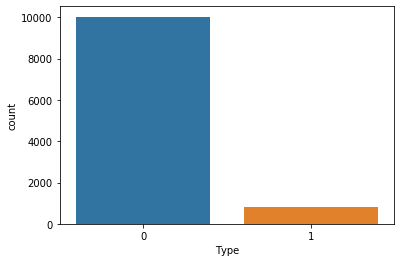

In [34]:
sns.countplot(df_apps['Type'],label="Count")
plt.show()

### Most popular category

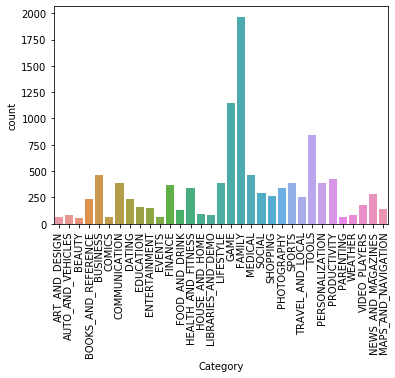

In [35]:
sns.countplot(df_apps['Category'],label="Count")
plt.xticks(rotation='vertical')
plt.show()

In [36]:
df_apps.groupby('Category')['Category'].count()

Category
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     230
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1968
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       84
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         390
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   841
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: Category, dtype: int64

## Feature Engineering

In [37]:
#dropping of unrelated and unnecessary items
df_apps.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [38]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10839
Data columns (total 11 columns):
Category          10829 non-null object
Rating            10829 non-null float64
Reviews           10829 non-null int32
Size              10829 non-null float64
Installs          10829 non-null int64
Type              10829 non-null int64
Price             10829 non-null float64
Content Rating    10829 non-null int32
Genres            10829 non-null object
Category_c        10829 non-null int32
Genres_c          10829 non-null int32
dtypes: float64(3), int32(4), int64(2), object(2)
memory usage: 1.1+ MB


In [39]:
df_apps.drop(labels = ['Category','Genres'], axis = 1, inplace = True)
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10839
Data columns (total 9 columns):
Rating            10829 non-null float64
Reviews           10829 non-null int32
Size              10829 non-null float64
Installs          10829 non-null int64
Type              10829 non-null int64
Price             10829 non-null float64
Content Rating    10829 non-null int32
Category_c        10829 non-null int32
Genres_c          10829 non-null int32
dtypes: float64(3), int32(4), int64(2)
memory usage: 996.8 KB


### Transforming the prediction target (Y) using Label Encoder

In [40]:
from sklearn import preprocessing
from sklearn import utils
Y= df_apps['Rating']
X = df_apps.drop('Rating', axis=1)
lab_enc = preprocessing.LabelEncoder()
rating_encoded = lab_enc.fit_transform(Y)
print(rating_encoded)
print(utils.multiclass.type_of_target(Y))
print(utils.multiclass.type_of_target(Y.astype('int')))
print(utils.multiclass.type_of_target(rating_encoded))

[30 28 36 ...  0 34 34]
continuous
multiclass
multiclass


In [66]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

X_RFE = df_apps.drop('Rating', axis=1)

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_RFE, rating_encoded)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [67]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 1


In [68]:
X_RFE.drop(X_RFE.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_RFE.head()

,Reviews
0,159
1,967
2,87510
3,215644
4,967


[0.36430184 0.27203478 0.15981874 0.00293192 0.01352419 0.02340507
 0.06797158 0.09601187]


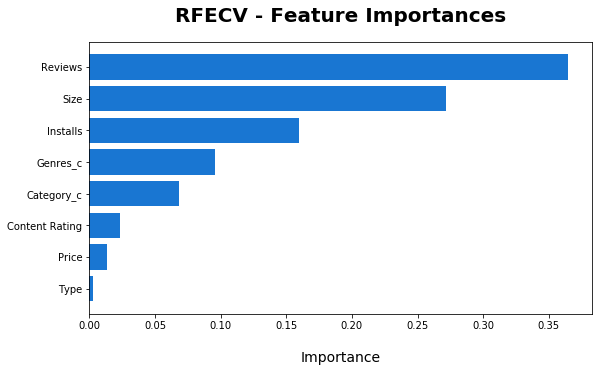

In [69]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

X_FI = df_apps.drop('Rating', axis=1)

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_FI, rating_encoded)
# display the relative importance of each attribute
print(model.feature_importances_)
dset = pd.DataFrame()
dset['attr'] = X_FI.columns
dset['importance'] = model.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(9, 5))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## Modeling

In [70]:
X_FI.head()
depVar= df_apps['Rating']
#depVar=rating_encoded

In [46]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

#Training Set (Feature Space: X Training)
X_train = XX[: 1000]
X_train_count = len(X_train.index)
print('The number of observations in the Y training set are:',str(X_train_count))
X_train.head()

The number of observations in the Y training set are: 1000


,Reviews,Size,Installs,Type,Price,Content Rating,Category_c,Genres_c
0,159,19000000.0,10000,0,0.0,0,0,0
1,967,14000000.0,500000,0,0.0,0,0,1
2,87510,8700000.0,5000000,0,0.0,0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0,0
4,967,2800000.0,100000,0,0.0,0,0,2


In [47]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
#y_train_count = len(y_train)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [48]:
#Testing Set (X Testing)
X_test = XX[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
X_test.head()

The number of observations in the feature testing set is: 100


,Reviews,Size,Installs,Type,Price,Content Rating,Category_c,Genres_c
10740,8484,1700000.0,1000000,0,0.0,0,25,91
10741,32,7900000.0,1000,0,0.0,0,16,29
10742,16,1200000.0,500,0,0.0,0,18,19
10743,1,2000000.0,100,0,0.0,0,11,24
10744,1,5800000.0,1,0,0.0,0,11,24


In [49]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
#y_test_count = len(y_test)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


10740    4.2
10741    5.0
10742    3.4
10743    0.0
10744    0.0
Name: Rating, dtype: float64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 8), (750,), (250, 8), (250,))

In [52]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

### Random Forest Regression

In [53]:
from sklearn.model_selection import cross_val_score
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))

print('These values correspond to the the following: ')
print('1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model')
print('2nd value:  The time for fitting the estimator on the train set for each cv split.')
print('3rd Value:  The time for scoring the estimator on the test set for each cv split.')
print('R-Squared:  %.3f' % modelRF.score(X_train,y_train))

[0.43703337 0.60962121 0.41138393]
These values correspond to the the following: 
1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model
2nd value:  The time for fitting the estimator on the train set for each cv split.
3rd Value:  The time for scoring the estimator on the test set for each cv split.
R-Squared:  0.930


### Support Vector Regression

In [54]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train))
print('R-Squared:  %.3f' % modelSVR.score(X_train,y_train))

[-0.01695971 -0.01677     0.01178045]
R-Squared:  0.496


### Linear Regression

In [55]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
print('R-Squared:  %.3f' % modelLR.score(X_train,y_train))

[-0.01257082 -0.03493534  0.02720635]
R-Squared:  0.094


## Predictions

In [56]:
#RandomForest Regression Model Predictions

predRF = modelRF.predict(X_test)
predRF_Rsquared = r2_score(y_test,predRF)
rmseRF = sqrt(mean_squared_error(y_test, predRF))
print('RandomForest Regression Model Predictions:')
print('RMSE: %.3f' % rmseRF)

#Support Vector Regression Model Predictions

predSVR = modelSVR.predict(X_test)
predSVR_Rsquared = r2_score(y_test,predSVR)
rmseSVR = sqrt(mean_squared_error(y_test, predSVR))
print('Support Vector Regression Model Predictions:')
print('RMSE: %.3f' % rmseSVR)

#Linear Regression Model Predictions

predLR = modelLR.predict(X_test)
predLR_Rsquared = r2_score(y_test,predLR)
rmseLR = sqrt(mean_squared_error(y_test, predLR))
print('Linear Regression Model Predictions:')
print('RMSE: %.3f' % rmseLR)

RandomForest Regression Model Predictions:
RMSE: 0.676
Support Vector Regression Model Predictions:
RMSE: 0.942
Linear Regression Model Predictions:
RMSE: 0.928


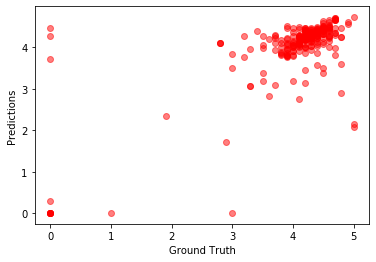

In [57]:
#Random Forest Selected Model with best performance
#RMSE: 0.717
#R-Squared:  0.922
plt.scatter(y_test, predRF, c='r', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

## Cross Validation

In [58]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [59]:
# Perform 6-fold cross validation
scores = cross_val_score(modelRF, XX, depVar, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.37535298 0.4856202  0.53844483 0.42566469 0.452099   0.45466064]


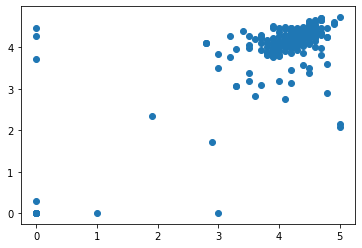

In [60]:
# Make cross validated predictions
predictions = cross_val_predict(modelRF, XX, depVar, cv=6)
plt.scatter(y_test, predRF)

In [61]:
accuracy = metrics.r2_score(y_test, predRF)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.5197703923810243
